In [3]:
import json
import csv

def convert_json_to_csv(input_file, output_file):
    with open(input_file, 'r') as json_file:
        data = json.load(json_file)
    
    time_tags_seen = set() 
    with open(output_file, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["time_tag", "total"])
        for item in data:
            time_tag = item["time_tag"]
            if time_tag not in time_tags_seen:
                writer.writerow([time_tag, item["total"]])
                time_tags_seen.add(time_tag)
                
convert_json_to_csv('magnetometers-7-day.json', 'magnetometers-7-day.csv')


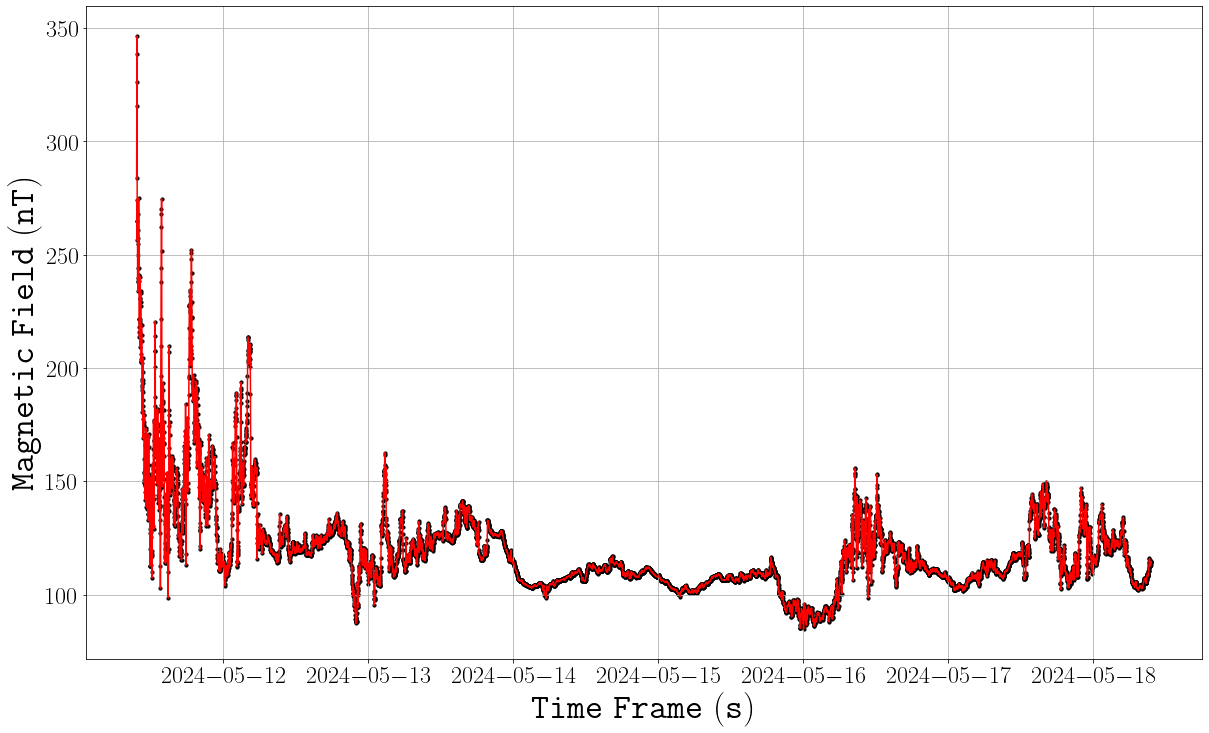

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = 'magnetometers-7-day.csv'
df = pd.read_csv(csv_file)

date_column = 'time_tag'
value_column = 'total'

df[date_column] = pd.to_datetime(df[date_column])

plt.rcParams.update({
    "font.family": 'serif',
    "text.usetex": True,
    "font.size": 24
})

plt.figure(figsize=(20, 12))

plt.scatter(df[date_column], df[value_column], color='black', marker='o', label='Markers', s=10)

plt.plot(df[date_column], df[value_column], color='red', linestyle='-', label='Line')

plt.xlabel(r'$\tt Time\ Frame\ (s)$', fontsize=35)
plt.ylabel(r'$\tt Magnetic\ Field\ ({\tt nT})$', fontsize=35)


plt.grid(True)
plt.savefig('magnetometers-7-day.pdf', bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()